<a href="https://colab.research.google.com/github/EdioHub/Perceptron-implementation-Iris/blob/main/Perceptron_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
Este projeto foi feito com objetivo de implementar um perceptron.

Usei um dataset íris, por ser equilibrado e não necessitar de pré-processamento.

Ele serviu de basse para implementação de uma função de perceptron para o projeto Perceptron-Diagnóstico de doença cardíaca

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
caminho =('/content/drive/MyDrive/Projetos git/09-perceptron_iris/ iris.csv')
dataset = pd.read_csv(caminho)
dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Setosa

onde no dataset species for = setosa coloca -1, onde não for coloca 1

In [4]:
y = dataset['Species']
y = np.where(y == 'setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [5]:
X = dataset.drop(['Species'], axis=1)
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
import seaborn as sns


<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

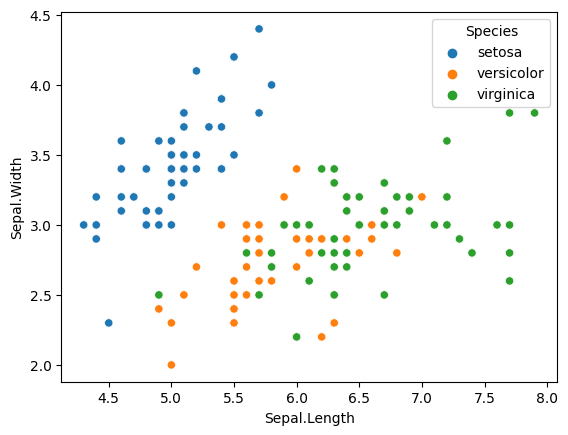

In [7]:
sns.scatterplot(data=dataset, x="Sepal.Length", y="Sepal.Width",hue="Species")

<Axes: xlabel='Sepal.Length', ylabel='Petal.Length'>

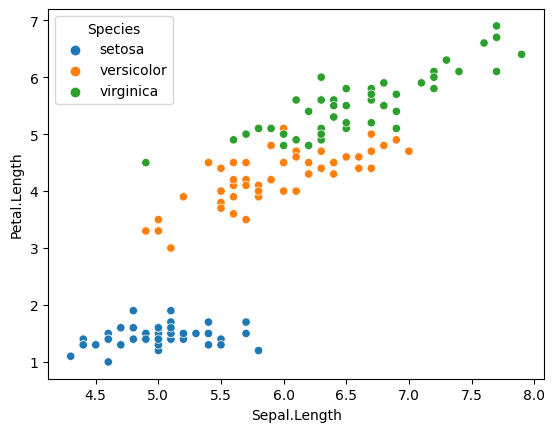

In [8]:
sns.scatterplot(data=dataset, x="Sepal.Length", y="Petal.Length", hue="Species")

separação treino e texte

In [9]:
SEED = 1234
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)

In [10]:
X_train.shape

(120, 4)

função degrau de ativação

In [11]:
@np.vectorize
def ativacao(u, t):
  return (1 if u > t else -1)

#somente visualização
componentes da equação do perceptron

In [12]:
 w = np.zeros(X_train.shape[1])
 print(w)
 j = np.random.randint(X_train.shape[0])
 print (j)
 b = 0.5
 u = np.sum(w * X_train.iloc[j,]) + b
 print(u)
 dataset.iloc[63,]

[0. 0. 0. 0.]
66
0.5


Sepal.Length           6.1
Sepal.Width            2.9
Petal.Length           4.7
Petal.Width            1.4
Species         versicolor
Name: 63, dtype: object

#Implementação do perceptron

■ u i = ∑ i w i x i

■ w i = w i + η*(y i - ŷ i )*x i

■ θ = θ + η*(y i - ŷ i )

In [13]:
def perceptron(X_train, y_train, threshold, eta, epochs):
  # parametros
  b = 0
  w = np.zeros(X_train.shape[1])

  for i in np.arange(epochs):
    print(f"Epoch: {i}")
    j = np.random.randint(X_train.shape[0])
    print(f"j :{j}")
    u = np.sum(w * X_train.iloc[j,]) + b
    y_hat = ativacao(u, threshold)
    print(f"u :{u}")
    print(f"y_hat :{y_hat}")
    if y_train[j] != y_hat:
      w = w + eta*(y_train[j] - y_hat)*X_train.iloc[j,]
      b = b + eta*(y_train[j] - y_hat)

  return [w, b]

In [14]:
modelo = perceptron(X_train, y_train, 0.5, 1, 100)

Epoch: 0
j :72
u :0.0
y_hat :-1
Epoch: 1
j :21
u :0.0
y_hat :-1
Epoch: 2
j :56
u :117.78000000000002
y_hat :1
Epoch: 3
j :112
u :52.48
y_hat :1
Epoch: 4
j :13
u :49.599999999999994
y_hat :1
Epoch: 5
j :24
u :30.499999999999996
y_hat :1
Epoch: 6
j :73
u :47.12
y_hat :1
Epoch: 7
j :93
u :41.32
y_hat :1
Epoch: 8
j :90
u :57.26
y_hat :1
Epoch: 9
j :109
u :53.63999999999999
y_hat :1
Epoch: 10
j :53
u :52.44
y_hat :1
Epoch: 11
j :9
u :30.819999999999997
y_hat :1
Epoch: 12
j :117
u :37.54
y_hat :1
Epoch: 13
j :115
u :54.88
y_hat :1
Epoch: 14
j :32
u :46.919999999999995
y_hat :1
Epoch: 15
j :87
u :45.58
y_hat :1
Epoch: 16
j :96
u :12.18
y_hat :1
Epoch: 17
j :75
u :-47.12000000000001
y_hat :-1
Epoch: 18
j :67
u :40.35999999999999
y_hat :1
Epoch: 19
j :99
u :17.12000000000001
y_hat :1
Epoch: 20
j :58
u :31.28
y_hat :1
Epoch: 21
j :39
u :37.03999999999999
y_hat :1
Epoch: 22
j :90
u :41.68000000000001
y_hat :1
Epoch: 23
j :14
u :36.32000000000001
y_hat :1
Epoch: 24
j :57
u :-24.0
y_hat :-1
Epoch: 

In [15]:
modelo

[Sepal.Length    -4.0
 Sepal.Width     -6.4
 Petal.Length    12.8
 Petal.Width      6.0
 dtype: float64,
 -2]

In [16]:
y_test

array([ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1])

In [17]:
def prediction(x, modelo, threshold):
  w, b = modelo
  u = np.sum(w * x, axis=1) + b
  return ativacao(u, threshold)

In [18]:
y_hat = prediction(X_test, modelo, 0.5)
y_hat

array([ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1])

In [19]:
y_test

array([ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1])

In [20]:
X_test_with_label = X_test
X_test_with_label["Correct"] = y_test == y_hat
print(y_test == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


O crosstab vai comparar entre os 2 arrays os pontos coincidentes, acertos

In [21]:
pd.crosstab(y_test, y_hat, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,1,All
True,,,
-1,9,0,9
1,0,21,21
All,9,21,30


#Validação

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [23]:
accuracy_score(y_test, y_hat)


1.0

In [24]:
f1_score(y_test, y_hat, average='macro')

1.0

In [25]:
X_test_with_label = X_test
X_test_with_label["Correct"] = y_test == y_hat
print(y_test == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


#Plot
Para as Pétalas corretamente predictas e erros de predição

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

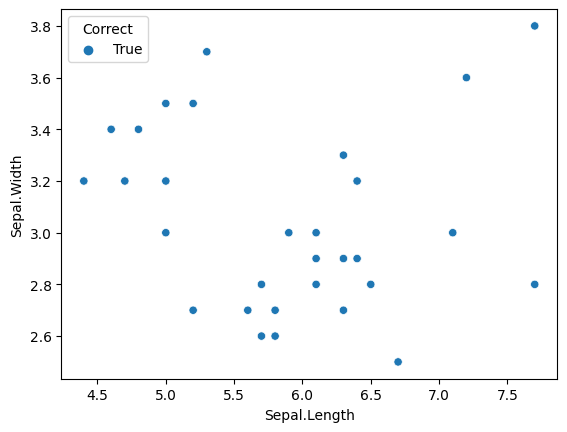

In [26]:
sns.scatterplot(data=X_test_with_label, x="Sepal.Length", y="Sepal.Width", hue="Correct")

Este dataset é extremamente equilibrado , por isso esse resultado de 100%

#Versicolor
aqui vamos definir um y para versicolor

In [27]:
y = dataset['Species']
y = np.where(y == 'versicolor', -1, 1)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

##Novo treinamento

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [29]:
X_train.shape

(120, 4)

In [30]:
modelo = perceptron(X_train, y_train, 0.5, 1, 100)

Epoch: 0
j :39
u :0.0
y_hat :-1
Epoch: 1
j :84
u :129.94
y_hat :1
Epoch: 2
j :28
u :152.76
y_hat :1
Epoch: 3
j :90
u :3.92
y_hat :1
Epoch: 4
j :51
u :-3.999999999999999
y_hat :-1
Epoch: 5
j :81
u :77.0
y_hat :1
Epoch: 6
j :49
u :83.52
y_hat :1
Epoch: 7
j :59
u :99.2
y_hat :1
Epoch: 8
j :81
u :-20.68
y_hat :-1
Epoch: 9
j :32
u :46.78000000000001
y_hat :1
Epoch: 10
j :16
u :48.68000000000001
y_hat :1
Epoch: 11
j :102
u :62.040000000000006
y_hat :1
Epoch: 12
j :103
u :59.0
y_hat :1
Epoch: 13
j :98
u :-111.45999999999998
y_hat :-1
Epoch: 14
j :35
u :73.0
y_hat :1
Epoch: 15
j :44
u :67.88
y_hat :1
Epoch: 16
j :110
u :68.17999999999999
y_hat :1
Epoch: 17
j :51
u :62.68
y_hat :1
Epoch: 18
j :99
u :66.83999999999999
y_hat :1
Epoch: 19
j :117
u :-73.26
y_hat :-1
Epoch: 20
j :21
u :-91.72
y_hat :-1
Epoch: 21
j :42
u :66.0
y_hat :1
Epoch: 22
j :40
u :79.64
y_hat :1
Epoch: 23
j :41
u :66.88000000000001
y_hat :1
Epoch: 24
j :8
u :-20.91999999999999
y_hat :-1
Epoch: 25
j :46
u :60.78000000000002
y_h

In [31]:
modelo

[Sepal.Length    13.4
 Sepal.Width     17.2
 Petal.Length     5.2
 Petal.Width     10.6
 dtype: float64,
 2]

In [32]:
y_test

array([-1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1])

In [33]:
y_hat = prediction(X_test, modelo, 0.5)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
pd.crosstab(y_test, y_hat, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,All
True,,
-1,13,13
1,17,17
All,30,30


##Validação

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [36]:
accuracy_score(y_test, y_hat)

0.5666666666666667

In [37]:
f1_score(y_test, y_hat, average='macro')

0.36170212765957444

In [38]:
X_test_with_label = X_test
X_test_with_label["Correct"] = y_test == y_hat
print(y_test == y_hat)

[False False  True  True False  True  True  True False  True False  True
  True False  True False  True  True  True False False False False False
  True  True  True False  True  True]


##Plot

Pétalas

<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

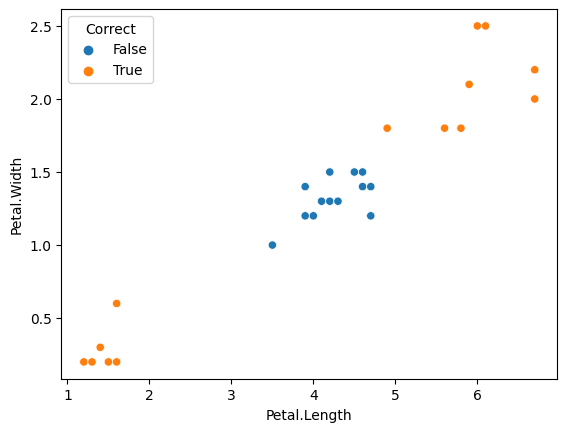

In [39]:
sns.scatterplot(data=X_test_with_label, x="Petal.Length", y="Petal.Width", hue="Correct")

Sépalas

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

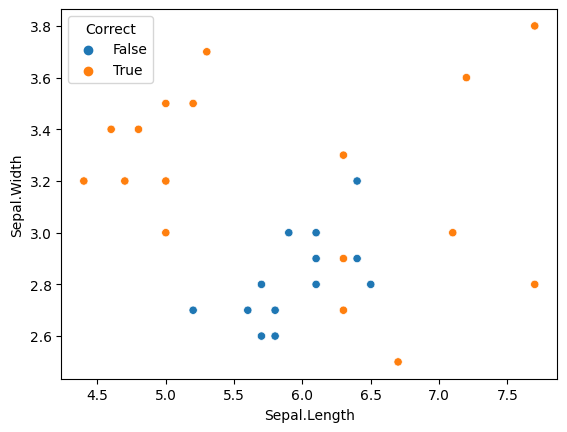

In [40]:
sns.scatterplot(data=X_test_with_label, x="Sepal.Length", y="Sepal.Width", hue="Correct")

In [41]:
modelo

[Sepal.Length    13.4
 Sepal.Width     17.2
 Petal.Length     5.2
 Petal.Width     10.6
 dtype: float64,
 2]

# Conclusão


A implementação do algorítmo demonstrou ser funcional e apresentou resultados altamente eficientes ao lidar com a espécie Setosa. A distinção clara de seus parâmetros permitiu uma classificação precisa e confiável. No entanto, quando se trata da espécie Versicolor, as medidas utilizadas revelaram-se bastante semelhantes às de outras espécies, o que resultou em resultados insatisfatórios na criação de agrupamentos preditivos.

É importante ressaltar que o objetivo principal deste projeto era testar a funcionalidade da implementação, buscando utilizá-la como base para um projeto futuro de diagnóstico de doenças cardíacas. Nesse sentido, embora os resultados não tenham sido ideais para a espécie Versicolor, essa etapa permitiu obter um conhecimento valioso sobre o funcionamento da função e sua aplicabilidade no contexto do diagnóstico médico.

Com base nas lições aprendidas durante esta implementação, é possível direcionar esforços para o aprimoramento do modelo,com criação de classes e considerando outras variáveis e métricas relevantes para o diagnóstico de doenças cardíacas. Além disso, é fundamental investigar e validar a eficácia do modelo em um conjunto de dados mais abrangente, que contemple uma variedade maior de espécies e características.

Em suma, embora o projeto tenha revelado limitações na criação de agrupamentos predictivos para a espécie Versicolor, ele foi bem-sucedido em seu objetivo primordial de testar a implementação da função. Essa etapa inicial é fundamental para o desenvolvimento futuro de um projeto de diagnóstico de doenças cardíacas mais robusto e confiável, que possa fornecer informações precisas e auxiliar no cuidado e tratamento de pacientes.